<b>

<p>
<center>
<font size="5">
Heart disease
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Author: Jingshu Song
</font>
</center>
</p>

</b>

# Introduction
- As we all know, Heart disease is a common disease in this world, and there are a great number of people died because of it. In this project, I want to build a model to predict the heart disease based on the patients information and figure out what features contributes most to the heart disease. 
<br>
- Data is from kaggle. The number of columns is 14 with 303 rows. 

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

# Load Data

In [5]:
data=pd.read_csv('heart.csv')

In [6]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
#check missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
#move 'target' to the front
tar = data['target']
data = data.drop(labels=['target'], axis=1)
data.insert(0, 'target', tar)
data.head()

,target,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,1,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,1,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,1,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,1,57,0,0,120,354,0,1,163,1,0.6,2,0,2


Variable information:

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

trestbps - resting blood pressure (in mm Hg on admission to the hospital)

chol - serum cholestoral in mg/dl

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

restecg - resting electrocardiographic results

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest

slope - the slope of the peak exercise ST segment

ca - number of major vessels (0-3) colored by flourosopy

thal - 3 = normal; 6 = fixed defect; 7 = reversable defect

target - have disease or not (1=yes, 0=no)

# EDA

In [10]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [11]:
#calcuatle the precentage of disease   
disease_ratio = data['target'].value_counts() / len(data)
disease_ratio

1    0.544554
0    0.455446
Name: target, dtype: float64

In [12]:
data.groupby(['target','sex']).mean()

age        cp    trestbps        chol       fbs   restecg  \
target sex                                                                    
0      0    59.041667  0.166667  146.125000  274.958333  0.250000  0.541667   
       1    56.087719  0.543860  131.929825  246.061404  0.140351  0.429825   
1      0    54.555556  1.333333  128.736111  256.750000  0.083333  0.583333   
       1    50.903226  1.408602  129.741935  230.989247  0.182796  0.602151   

               thalach     exang   oldpeak     slope        ca      thal  
target sex                                                                
0      0    142.416667  0.583333  1.841667  0.958333  1.291667  2.500000  
       1    138.403509  0.543860  1.531579  1.210526  1.140351  2.552632  
1      0    154.027778  0.111111  0.554167  1.583333  0.305556  2.000000  
       1    161.903226  0.161290  0.605376  1.602151  0.408602  2.215054

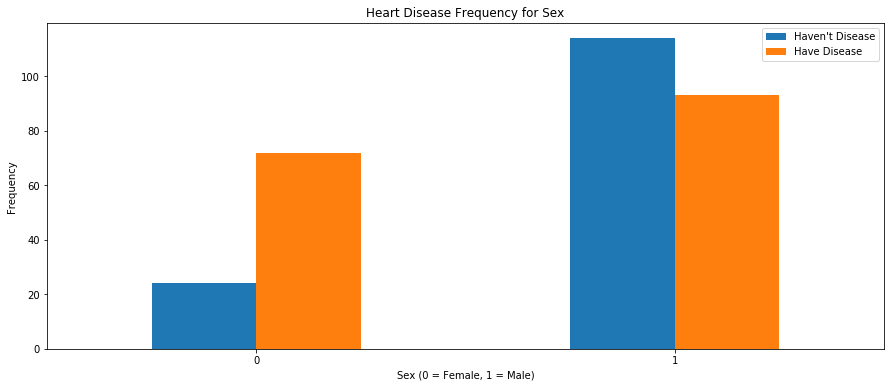

In [13]:
pd.crosstab(data.sex,data.target).plot(kind="bar",figsize=(15,6))
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

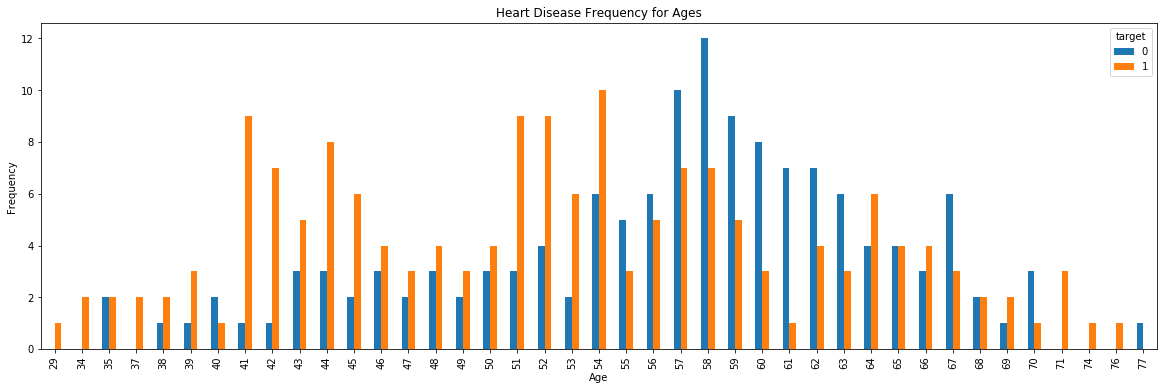

In [14]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()

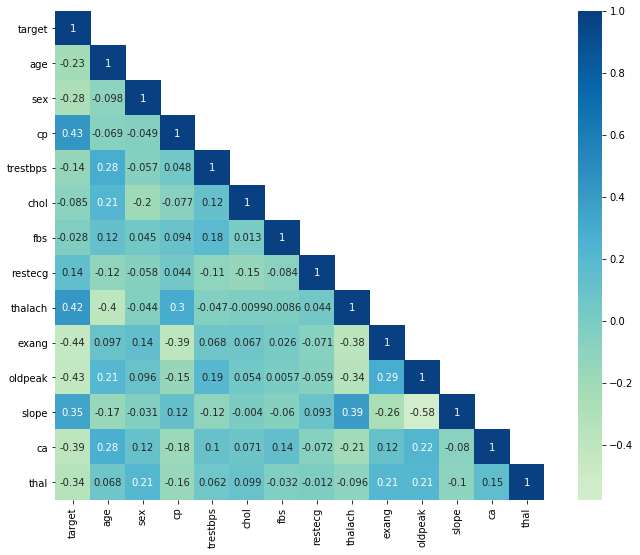

In [15]:
#The most correlated feature with dependent variable is cp and slope
plt.figure(figsize=(12,9))

corr_matrix=data.corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
sns.heatmap(corr_matrix, vmax=1, mask=mask,square=True,annot=True,cmap="GnBu",center=0)

# Data preprocessing

In [16]:
#one hot encoding for categorical features
data = pd.get_dummies(data, columns=['sex','restecg','cp','thal','slope','fbs','exang','ca'])

In [17]:
data.head()

,target,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,restecg_0,restecg_1,...,slope_2,fbs_0,fbs_1,exang_0,exang_1,ca_0,ca_1,ca_2,ca_3,ca_4
0,1,63,145,233,150,2.3,0,1,1,0,...,0,0,1,1,0,1,0,0,0,0
1,1,37,130,250,187,3.5,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
2,1,41,130,204,172,1.4,1,0,1,0,...,1,1,0,1,0,1,0,0,0,0
3,1,56,120,236,178,0.8,0,1,0,1,...,1,1,0,1,0,1,0,0,0,0
4,1,57,120,354,163,0.6,1,0,0,1,...,1,1,0,0,1,1,0,0,0,0


In [18]:
#Get features and the target
X=data.drop(columns=['target'])
y=data['target']

In [19]:
# Divide the data to training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0, stratify=y)

print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (242, 30)
X_test (61, 30)
y_train (242,)
y_test (61,)


# Model

In [20]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [21]:
# LogisticRegression

log_reg = LogisticRegression(solver='liblinear')
log_reg.fit(X_train, y_train)
print_score(log_reg, X_train, y_train, X_test, y_test, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.95%
_______________________________________________
Classification Report:	Precision Score: 85.51%
			Recall Score: 89.39%
			F1 score: 87.41%
_______________________________________________
Confusion Matrix: 
 [[ 90  20]
 [ 14 118]]

Test Result:
Accuracy Score: 86.89%
_______________________________________________
Classification Report:	Precision Score: 85.71%
			Recall Score: 90.91%
			F1 score: 88.24%
_______________________________________________
Confusion Matrix: 
 [[23  5]
 [ 3 30]]



In [22]:
#K-nearest neighbors
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

print_score(knn_classifier, X_train, y_train, X_test, y_test, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 74.38%
_______________________________________________
Classification Report:	Precision Score: 73.33%
			Recall Score: 83.33%
			F1 score: 78.01%
_______________________________________________
Confusion Matrix: 
 [[ 70  40]
 [ 22 110]]

Test Result:
Accuracy Score: 72.13%
_______________________________________________
Classification Report:	Precision Score: 73.53%
			Recall Score: 75.76%
			F1 score: 74.63%
_______________________________________________
Confusion Matrix: 
 [[19  9]
 [ 8 25]]



In [23]:
#Decision tree

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[110   0]
 [  0 132]]

Test Result:
Accuracy Score: 77.05%
_______________________________________________
Classification Report:	Precision Score: 78.79%
			Recall Score: 78.79%
			F1 score: 78.79%
_______________________________________________
Confusion Matrix: 
 [[21  7]
 [ 7 26]]



In [24]:
#random forest
random_forest = RandomForestClassifier(n_estimators=1000, random_state=42)
random_forest.fit(X_train, y_train)

print_score(random_forest, X_train, y_train, X_test, y_test, train=True)
print_score(random_forest, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 100.00%
			F1 score: 100.00%
_______________________________________________
Confusion Matrix: 
 [[110   0]
 [  0 132]]

Test Result:
Accuracy Score: 83.61%
_______________________________________________
Classification Report:	Precision Score: 84.85%
			Recall Score: 84.85%
			F1 score: 84.85%
_______________________________________________
Confusion Matrix: 
 [[23  5]
 [ 5 28]]



In [27]:
#feature importance
#Conslusion: thalach and oldpeak are most 2 important features.
rf = RandomForestClassifier(
    n_estimators=30, 
    min_samples_leaf=1,
    min_samples_split=2
    )
rf.fit(X_train, y_train)
fi = pd.DataFrame({'feature': list(X.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)
fi.head(5)

,feature,importance
3,thalach,0.092990
4,oldpeak,0.083560
10,cp_0,0.083378
17,thal_3,0.082769
25,ca_0,0.079863
